# Maven Analytics - CRM Sales Oppurtunities

**CRM Sales Opportunities** The data contains B2B sales opportunities from a CRM database for a fictitious company that sells computer hardware, including information on accounts, products, sales teams, and sales opportunities.

# Assigned Task
For the Maven Sales Challenge, you'll play the role of a BI Developer for MavenTech, a company that specializes in selling computer hardware to large businesses. They've been using a new CRM system to track their sales opportunities but have no visibility of the data outside of the platform.

In an effort to become a data-driven organization, you've been asked to create an interactive dashboard that enables sales managers to track their team's quarterly performance.

Dataset (CSV): https://github.com/frdz-salman/CRM-Sales-Oppurtunities/tree/main/Dataset

# Objectives
  - How is each sales team performing compared to the rest?
  - Are any sales agents lagging behind?
  - Are there any quarter-over-quarter trends?
  - Do any products have better win rates?

# **A. Data Preparation**

## Import Library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

pd.set_option('float_format','{:.2f}'.format)

pd.set_option('display.max_columns',None)

## Reuseable Function

### Commas

In [2]:
def commas(x):
    if pd.isna(x):
        return x
    elif isinstance(x, float):
        return f"{x:,.2f}"
    elif isinstance(x, int):
        return f"{x:,}"
    else:
        return x

def format_commas(x, pos):
    if abs(x) >= 1_000_000_000:
        return f'{x / 1_000_000_000:.1f}B'
    elif abs(x) >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif abs(x) >= 1_000:
        return f'{x / 1_000:.1f}K'
    else:
        return f'{x:.0f}'

def format_yaxis_comma(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_commas))

def format_xaxis_comma(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_commas))

def add_bar_labels(x, y, ax=None, rotation=0, fontsize=11):
    if ax is None:
        ax = plt.gca()
    for i, value in enumerate(y):
        ax.text(x[i], value, f'{value:,.0f}', ha='center', va='bottom',
                fontsize=fontsize, rotation=rotation,bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

### Chart

In [3]:
def add_barh_labels(x, y, ax=None, fontsize=9):
    if ax is None:
        ax = plt.gca()
    for i, value in enumerate(y):
        ax.text(value, i, f'{value:,.0f}', va='center', ha='left',
                fontsize=fontsize, bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

def add_line_labels(x, y, ax=None, offset=10, fontsize=8):
    if ax is None:
        ax = plt.gca()
    for i, value in enumerate(y):
        if not pd.isna(value):
            ax.annotate(f'{value:,.0f}', (x[i], value),
                    textcoords="offset points", xytext=(0, offset),
                    ha='center', fontsize=fontsize,bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'))

def get_conditional_colors(values, first_color, up_color, down_color):
    colors = []
    for i, value in enumerate(values):
        if i == 0:
            colors.append(first_color)
        else:
            if value > values[i - 1]:
                colors.append(up_color)
            else:
                colors.append(down_color)
    return colors

In [4]:
def bar_chart(x, y, title, xlabel='', ylabel='', color='gainsboro', rotation=0, palette=None):
    plt.figure(figsize=(12, 6))
    if palette:
        colors = sns.color_palette(palette, len(y))
    else:
        colors = color
    plt.bar(x, y, color=colors)
    add_bar_labels(x, y, rotation=rotation)
    plt.title(title, fontsize=14, fontweight='semibold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    format_yaxis_comma()
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

def barh_chart(x, y, title=None, xlabel='', ylabel='', color='gainsboro', palette=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    if palette:
        colors = sns.color_palette(palette, len(y))
    else:
        colors = color
    ax.barh(x, y, color=colors)
    add_barh_labels(x, y, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='semibold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, axis='x', alpha=0.3)
    format_xaxis_comma(ax=ax)
    ax.invert_yaxis()
    return ax

def conditional_bar(x, y, title, xlabel='', ylabel='',
                        first_color='gainsboro', up_color='green', down_color='red',
                        ax=None):
    colors = get_conditional_colors(y, first_color, up_color, down_color)
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x, y, color=colors)
    add_bar_labels(x, y, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='semibold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    format_yaxis_comma(ax=ax)
    ax.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()


def line_chart(x, y, title, xlabel='', ylabel='', first_color='gainsboro',
                    up_color='green', down_color='red', line_color='gainsboro'):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color=line_color, linewidth=2, alpha=0.7)
    colors = get_conditional_colors(y, first_color, up_color, down_color)

    for xi, yi, c in zip(x, y, colors):
        plt.plot(xi, yi, marker='o', color=c, markersize=8)
    add_line_labels(x, y)
    plt.title(title, fontsize=14, fontweight='semibold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    format_yaxis_comma()
    plt.tight_layout()

def scatter_plot(x, y, title, xlabel='', ylabel='', hue=None, size=None, style=None, palette='viridis'):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, hue=hue, size=size, style=style, alpha=0.6, s=50, palette=palette)
    plt.title(title, fontsize=14, fontweight='semibold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    format_yaxis_comma()
    format_xaxis_comma()
    plt.tight_layout()
    plt.show()

def pie_chart_custom(values, labels, title='', palette='Set2', figsize=(8,8), ax=None):
    colors = sns.color_palette(palette, len(values))
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({val:,})'
        return my_autopct
    wedges, texts, autotexts = ax.pie(
        values, labels=labels,
        autopct=make_autopct(values),
        startangle=90, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=2)
    )
    ax.set_title(title, fontsize=14, pad=10, fontweight='semibold')
    ax.axis('equal')
    if ax is None:
        plt.show()

## Import Dataset

In [5]:
sales_pipeline_url = 'https://raw.githubusercontent.com/frdz-salman/CRM-Sales-Oppurtunities/refs/heads/main/Dataset/sales_pipeline.csv'
sales_teams_url = 'https://raw.githubusercontent.com/frdz-salman/CRM-Sales-Oppurtunities/refs/heads/main/Dataset/sales_teams.csv'
accounts_url = 'https://raw.githubusercontent.com/frdz-salman/CRM-Sales-Oppurtunities/refs/heads/main/Dataset/accounts.csv'
products_url = 'https://raw.githubusercontent.com/frdz-salman/CRM-Sales-Oppurtunities/refs/heads/main/Dataset/products.csv'
dictionary_url = 'https://raw.githubusercontent.com/frdz-salman/CRM-Sales-Oppurtunities/refs/heads/main/Dataset/data_dictionary.csv'


sales_pipeline = pd.read_csv(sales_pipeline_url)
sales_teams = pd.read_csv(sales_teams_url)
accounts = pd.read_csv(accounts_url)
products = pd.read_csv(products_url)
dictionary = pd.read_csv(dictionary_url)

# **B. Data Cleaning**

## Detecting Duplicated Data

In [6]:
print(f"sales_pipeline: {sales_pipeline.duplicated().sum()}")
print(f"sales_teams: {sales_teams.duplicated().sum()}")
print(f"accounts: {accounts.duplicated().sum()}")
print(f"products: {products.duplicated().sum()}")

sales_pipeline: 0
sales_teams: 0
accounts: 0
products: 0


## Detecting Null Data

In [7]:
sales_pipeline.isna().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [8]:
sales_pipeline['deal_stage'].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

In [9]:
sales_pipeline[sales_pipeline['deal_stage'] == "Engaging"]

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN
25,UP409DSB,Maureen Marcano,MG Advanced,Ganjaflex,Engaging,2016-11-10,NaN,NaN
42,EG7OFLFR,Kami Bicknell,GTX Basic,NaN,Engaging,2016-11-14,NaN,NaN
44,OLVI7L8M,Cassey Cress,GTXPro,NaN,Engaging,2016-11-16,NaN,NaN
56,F5U1ACDD,Kami Bicknell,GTX Plus Basic,NaN,Engaging,2016-11-19,NaN,NaN
...,...,...,...,...,...,...,...,...
8277,NGTVHTFH,Boris Faz,GTXPro,NaN,Engaging,2017-12-19,NaN,NaN
8283,HB740BLB,Hayden Neloms,MG Special,Silis,Engaging,2017-12-20,NaN,NaN
8285,HCQK8NQ8,Wilburn Farren,GTX Plus Basic,NaN,Engaging,2017-12-20,NaN,NaN
8286,RDHTQLNI,Cassey Cress,GTX Plus Pro,NaN,Engaging,2017-12-21,NaN,NaN


In [10]:
sales_teams.isna().sum()

sales_agent        0
manager            0
regional_office    0
dtype: int64

In [11]:
accounts.isna().sum()

account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [12]:
accounts[accounts['subsidiary_of'].notna()]

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
10,Codehow,software,1998,2714.90,2641,United States,Acme Corporation
13,Dalttechnology,software,2013,98.79,96,United States,Bubba Gump
14,dambase,marketing,1995,2173.98,2928,United States,Inity
17,Donquadtech,technolgy,1992,1712.68,3194,United States,Acme Corporation
21,Faxquote,telecommunications,1995,1825.82,5595,United States,Sonron
24,Funholding,finance,1991,2819.50,7227,United States,Golddex
29,Gogozoom,telecommunications,2007,86.68,187,United States,Sonron
39,Iselectrics,technolgy,2011,527.11,1428,United States,Acme Corporation


In [13]:
products.isna().sum()

product        0
series         0
sales_price    0
dtype: int64

## Converting Data Types

In [14]:
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [15]:
sales_pipeline[['engage_date', 'close_date']] = sales_pipeline[['engage_date', 'close_date']].apply(pd.to_datetime)
sales_pipeline['close_value'] = sales_pipeline['close_value'].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [16]:
sales_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


In [17]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [18]:
accounts[['year_established', 'employees']] = accounts[['year_established', 'employees']].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [20]:
products['sales_price'] = products['sales_price'].apply(pd.to_numeric, errors='coerce').astype('Int64')

## Checking Values & Typos

In [21]:
sales_pipeline['deal_stage'].unique()

array(['Won', 'Engaging', 'Lost', 'Prospecting'], dtype=object)

In [22]:
sales_pipeline['opportunity_id'].value_counts()

opportunity_id
1C1I7A6R    1
Z063OYW0    1
EC4QE1BX    1
MV1LWRNH    1
PE84CX4O    1
           ..
9MIWFW5J    1
6SLKZ8FI    1
LIB4KUZJ    1
18IUIUK0    1
8I5ONXJX    1
Name: count, Length: 8800, dtype: int64

In [23]:
sales_pipeline['product'].unique()

array(['GTX Plus Basic', 'GTXPro', 'MG Special', 'GTX Basic',
       'MG Advanced', 'GTX Plus Pro', 'GTK 500'], dtype=object)

In [24]:
sales_pipeline['product'] = sales_pipeline['product'].replace({
    "GTXPro": "GTX Pro"
})

In [25]:
sales_teams['manager'].unique()

array(['Dustin Brinkmann', 'Melvin Marxen', 'Cara Losch', 'Rocco Neubert',
       'Celia Rouche', 'Summer Sewald'], dtype=object)

In [26]:
accounts['sector'].unique()

array(['technolgy', 'medical', 'retail', 'software', 'entertainment',
       'marketing', 'telecommunications', 'finance', 'employment',
       'services'], dtype=object)

In [27]:
accounts['sector'] = accounts['sector'].replace({
    "technolgy": "technology"
})

In [28]:
accounts['office_location'].unique()

array(['United States', 'Kenya', 'Philipines', 'Japan', 'Italy', 'Norway',
       'Korea', 'Jordan', 'Brazil', 'Germany', 'Panama', 'Belgium',
       'Romania', 'Poland', 'China'], dtype=object)

In [29]:
accounts['office_location'] = accounts['office_location'].replace({
    "Philipines": "Philippines"
})

In [30]:
accounts["sector"]

0        technology
1           medical
2           medical
3           medical
4           medical
          ...      
80           retail
81       technology
82    entertainment
83         software
84          medical
Name: sector, Length: 85, dtype: object

### Values Group

In [31]:
sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].sample(10)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
3859,RUYLZD4O,Kary Hendrixson,GTX Pro,Sonron,Won,2017-06-12,2017-06-29,4798
845,XMH4CH4Q,Jonathan Berthelot,GTX Basic,Stanredtax,Won,2017-02-12,2017-05-21,518
5467,4MTIOMFQ,Reed Clapper,GTX Pro,Mathtouch,Won,2017-07-29,2017-08-08,4252
1694,WELHHO3U,Cecily Lampkin,GTX Plus Basic,Stanredtax,Won,2017-03-21,2017-03-30,966
7025,L1WPBDZG,Boris Faz,GTX Pro,Zotware,Won,2017-09-27,2017-12-12,4125
8228,TBS5Y874,Reed Clapper,GTX Plus Pro,Kan-code,Won,2017-12-09,2017-12-17,6456
1723,WNMF0OHM,Anna Snelling,GTX Plus Pro,dambase,Won,2017-03-23,2017-04-01,5060
2781,UXNB9OIB,Daniell Hammack,GTX Pro,Konex,Won,2017-04-27,2017-04-28,5676
852,2TKQ8B78,Daniell Hammack,GTX Plus Pro,Ontomedia,Won,2017-02-13,2017-05-21,5751
7361,2PX317QP,Kary Hendrixson,GTX Pro,Newex,Won,2017-10-08,2017-11-23,4780


## Replacing Value

In [32]:
accounts['sector'] = accounts['sector'].str.title()
accounts["sector"]

0        Technology
1           Medical
2           Medical
3           Medical
4           Medical
          ...      
80           Retail
81       Technology
82    Entertainment
83         Software
84          Medical
Name: sector, Length: 85, dtype: object

## Manipulating Dataset

### Join

In [33]:
sales_pipeline.head(1)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054


In [34]:
accounts.head(1)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,Technology,1996,1100.04,2822,United States,NaN


In [35]:
products.head(1)

,product,series,sales_price
0,GTX Basic,GTX,550


In [36]:
sales_teams.head(1)

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central


In [37]:
clean = (sales_pipeline
    .merge(accounts, on="account", how="left")
    .merge(products, on="product", how="left")
    .merge(sales_teams, on="sales_agent", how="left")
)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   opportunity_id    8800 non-null   object        
 1   sales_agent       8800 non-null   object        
 2   product           8800 non-null   object        
 3   account           7375 non-null   object        
 4   deal_stage        8800 non-null   object        
 5   engage_date       8300 non-null   datetime64[ns]
 6   close_date        6711 non-null   datetime64[ns]
 7   close_value       6711 non-null   Int64         
 8   sector            7375 non-null   object        
 9   year_established  7375 non-null   Int64         
 10  revenue           7375 non-null   float64       
 11  employees         7375 non-null   Int64         
 12  office_location   7375 non-null   object        
 13  subsidiary_of     1292 non-null   object        
 14  series            8800 n

### Feature Engineering

In [38]:
clean.head(1)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054,Retail,2001,718.62,2448,United States,NaN,GTX,1096,Dustin Brinkmann,Central


In [39]:
clean["year"] = clean["engage_date"].dt.year.astype("Int64")
clean["quarter"] = clean["engage_date"].dt.quarter.astype("Int64")

clean['deal_days'] = (clean['close_date'] - clean['engage_date']).dt.days.astype("Int64")

clean['deal_gap'] = clean['close_value'] - clean['sales_price']
clean['deal_gap_pct'] = (clean['close_value'] - clean['sales_price']) / clean['sales_price'].replace(0, np.nan) * 100

In [40]:
def label_deal(x):
    if pd.isna(x):
        return "No Deal"
    elif x > 0:
        return "Markup"
    elif x < 0:
        return "Discount"
    else:
        return "No Change"

clean['deal_type'] = clean['deal_gap_pct'].apply(label_deal)

In [41]:
clean.sample(10)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office,year,quarter,deal_days,deal_gap,deal_gap_pct,deal_type
5841,P4D1NK6D,Elease Gluck,GTX Basic,NaN,Engaging,2017-08-11,NaT,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,GTX,550,Celia Rouche,West,2017,3,<NA>,<NA>,<NA>,No Deal
7174,CTZ5I5R5,Cassey Cress,GTX Plus Pro,Bioplex,Won,2017-10-02,2017-12-05,5469,Medical,1991,326.82,1016,United States,NaN,GTX,5482,Rocco Neubert,East,2017,4,64,-13,-0.24,Discount
6834,1T8R8X79,Zane Levy,MG Advanced,Nam-zim,Won,2017-09-19,2017-11-19,4249,Services,1987,405.59,1179,Brazil,Warephase,MG,3393,Summer Sewald,West,2017,3,61,856,25.23,Markup
7258,1FHY3UGF,Corliss Cosme,GTX Pro,Zotware,Lost,2017-10-05,2017-10-13,0,Software,1979,4478.47,13809,United States,NaN,GTX,4821,Cara Losch,East,2017,4,8,-4821,-100.00,Discount
5365,82K9NWKO,Gladys Colclough,MG Advanced,NaN,Engaging,2017-07-27,NaT,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,MG,3393,Melvin Marxen,Central,2017,3,<NA>,<NA>,<NA>,No Deal
1446,A4LUP6W6,Cassey Cress,GTX Basic,Zotware,Won,2017-03-11,2017-05-22,586,Software,1979,4478.47,13809,United States,NaN,GTX,550,Rocco Neubert,East,2017,1,72,36,6.55,Markup
4054,9TRVSW35,Maureen Marcano,MG Special,Condax,Won,2017-06-20,2017-08-19,57,Medical,2017,4.54,9,United States,NaN,MG,55,Summer Sewald,West,2017,2,60,2,3.64,Markup
6829,G53492IF,Reed Clapper,GTX Pro,Massive Dynamic,Won,2017-09-19,2017-09-24,4369,Entertainment,1989,665.06,1095,United States,NaN,GTX,4821,Rocco Neubert,East,2017,3,5,-452,-9.38,Discount
5231,Y7TVU9AY,Niesha Huffines,GTX Basic,Streethex,Lost,2017-07-24,2017-11-06,0,Retail,1988,1376.80,1165,Belgium,NaN,GTX,550,Melvin Marxen,Central,2017,3,105,-550,-100.00,Discount
6983,V5ZP09PO,Versie Hillebrand,GTX Plus Basic,Dontechi,Lost,2017-09-25,2017-10-03,0,Software,1982,4618.00,10083,United States,NaN,GTX,1096,Dustin Brinkmann,Central,2017,3,8,-1096,-100.00,Discount


### Replacing Columns

In [42]:
clean = clean.rename(columns={
    "account": "company",
    "close_date": "closing_date",
    "close_value": "deal_value",
    "sector": "industry_sector",
    "year_established": "founded_year",
    "revenue": "annual_revenue",
    "employees": "employee_count",
    "subsidiary_of": "parent_company",
    "regional_office": "region",
})


In [43]:
clean = clean[["opportunity_id","company","annual_revenue","industry_sector","founded_year","parent_company","manager","employee_count","sales_agent","deal_stage","engage_date","closing_date","region","office_location","product","series","sales_price","deal_value","deal_gap","deal_gap_pct","deal_type","deal_days", "year", "quarter"]]
clean.head(3)

,opportunity_id,company,annual_revenue,industry_sector,founded_year,parent_company,manager,employee_count,sales_agent,deal_stage,engage_date,closing_date,region,office_location,product,series,sales_price,deal_value,deal_gap,deal_gap_pct,deal_type,deal_days,year,quarter
0,1C1I7A6R,Cancity,718.62,Retail,2001,NaN,Dustin Brinkmann,2448,Moses Frase,Won,2016-10-20,2017-03-01,Central,United States,GTX Plus Basic,GTX,1096,1054,-42,-3.83,Discount,132,2016,4
1,Z063OYW0,Isdom,3178.24,Medical,2002,NaN,Melvin Marxen,4540,Darcel Schlecht,Won,2016-10-25,2017-03-11,Central,United States,GTX Pro,GTX,4821,4514,-307,-6.37,Discount,137,2016,4
2,EC4QE1BX,Cancity,718.62,Retail,2001,NaN,Melvin Marxen,2448,Darcel Schlecht,Won,2016-10-25,2017-03-07,Central,United States,MG Special,MG,55,50,-5,-9.09,Discount,133,2016,4


## Export

In [44]:
clean.to_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\Maven - CRM Sales Oppurtunities\dataset\cleaned_crm_analysis.csv", index=False)

# **C. Exploratory Data Analysis**

In [45]:
sales_df = clean.copy()

## Dataset Overview

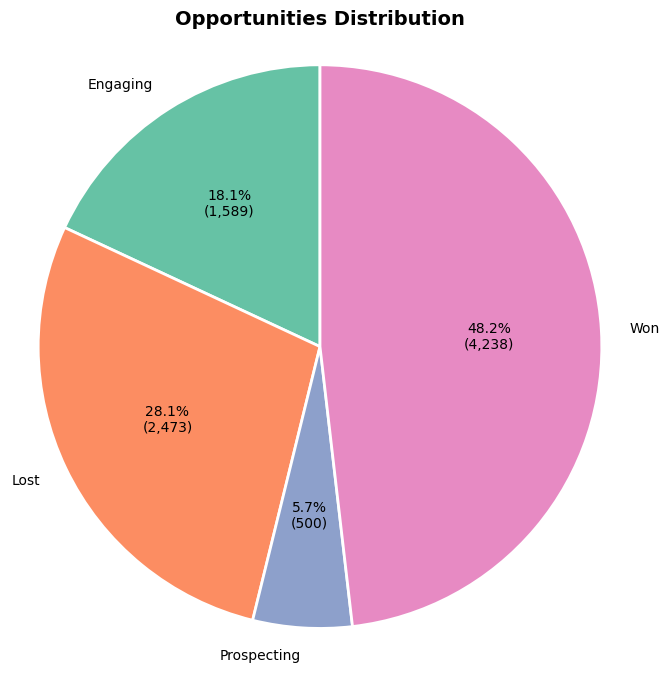

In [46]:
deal_stage_analysis = (sales_df.groupby('deal_stage').agg(total_opportunities=('opportunity_id', 'count')))

pie_chart_custom(deal_stage_analysis['total_opportunities'], deal_stage_analysis.index, title='Opportunities Distribution')

In [47]:
num_oppurtunity = sales_df['opportunity_id'].nunique()
num_region = sales_df['region'].nunique()
num_state = sales_df['office_location'].nunique()
num_company = sales_df['company'].nunique()
num_industry = sales_df['industry_sector'].nunique()
num_series = sales_df['series'].nunique()
num_product = sales_df['product'].nunique()

print(f"• Oppurtunity: {num_oppurtunity:,} deals")
print(f"• Region coverage: {num_region:,} region")
print(f"• State coverage: {num_state:,} states")
print(f"• Company: {num_company}")
print(f"• Industry: {num_industry}")
print(f"• Series: {num_series}")
print(f"• Product: {num_product}")

• Oppurtunity: 8,800 deals
• Region coverage: 3 region
• State coverage: 15 states
• Company: 85
• Industry: 10
• Series: 3
• Product: 7


In [48]:
total_pipeline_value = sales_df['sales_price'].sum()
total_won_value = sales_df[sales_df['deal_stage'] == 'Won']['deal_value'].sum()
total_lost_potential = sales_df[sales_df['deal_stage'] == 'Lost']['sales_price'].sum()
total_engaging_potential = sales_df[sales_df['deal_stage'] == 'Engaging']['sales_price'].sum()

print(f"• Total Pipeline Value: ${total_pipeline_value:,.2f}")
print(f"• Total Won Value: ${total_won_value:,.2f}")
print(f"• Total Lost Potential: ${total_lost_potential:,.2f}")
print(f"• Still Engaging Value: ${total_engaging_potential:,.2f}")
print(f"• Pipeline Conversion Rate: {(total_won_value/total_pipeline_value*100):.1f}%")

• Total Pipeline Value: $20,936,165.00
• Total Won Value: $10,005,534.00
• Total Lost Potential: $5,946,468.00
• Still Engaging Value: $3,892,229.00
• Pipeline Conversion Rate: 47.8%


## Geographic Analysis

In [49]:
regional_analysis = (
    sales_df
    .groupby('region')
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        total_revenue=('deal_value', 'sum'),
        avg_revenue=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean())))
regional_analysis = regional_analysis.sort_values(by='total_revenue', ascending=False)
regional_analysis.map(commas)


,total_opportunities,won_deals,total_revenue,avg_revenue
region,,,,
West,"2,997","1,438","3,568,647","2,481.67"
Central,"3,512","1,629","3,346,293","2,054.20"
East,"2,291","1,171","3,090,594","2,639.28"


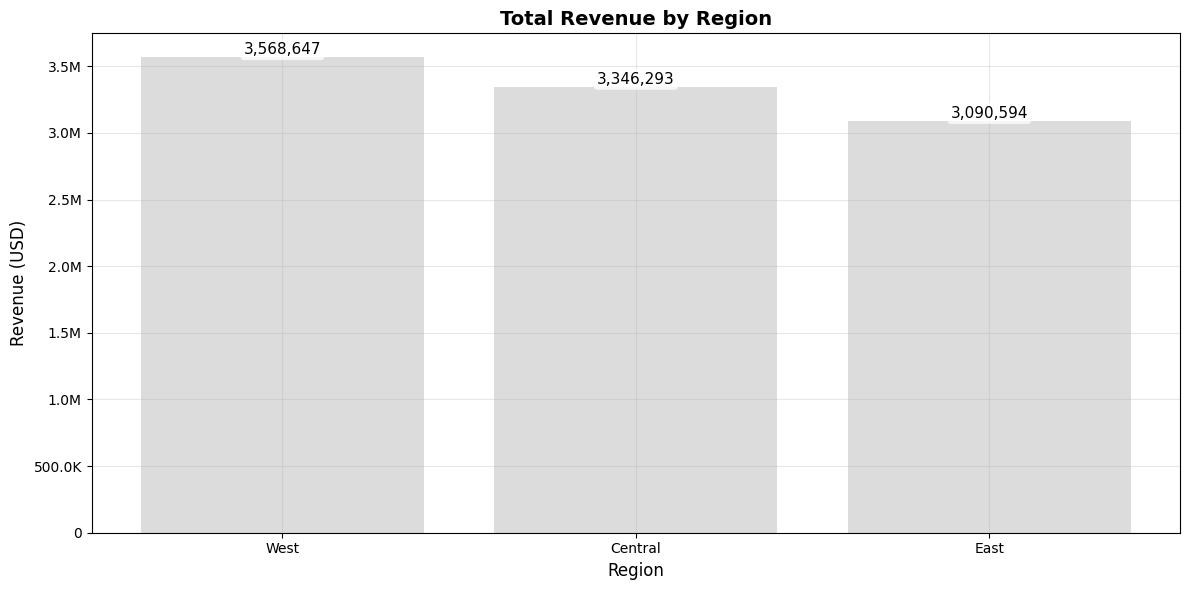

In [50]:
bar_chart(
    x=regional_analysis.index.get_level_values('region'),
    y=regional_analysis['total_revenue'],
    xlabel='Region',
    ylabel='Revenue (USD)',
    title='Total Revenue by Region'
)

In [51]:
office_analysis = (
    sales_df
    .groupby(['office_location'])
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        total_revenue=('deal_value', 'sum'),
        avg_revenue=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
    )
)
office_analysis = office_analysis.dropna()
office_analysis.sort_values(by=['total_revenue'], ascending=False).map(commas)

,total_opportunities,won_deals,total_revenue,avg_revenue
office_location,,,,
United States,"6,120","3,514","8,426,955","2,398.11"
Korea,200,111,"194,957","1,756.37"
Jordan,88,52,"163,339","3,141.13"
Panama,109,75,"151,777","2,023.69"
Japan,81,46,"123,506","2,684.91"
Belgium,109,63,"117,463","1,864.49"
Norway,91,50,"115,712","2,314.24"
Italy,94,54,"114,352","2,117.63"
Kenya,92,53,"107,408","2,026.57"


In [52]:
office_analysis = (
    sales_df
    .groupby(['region','office_location'])
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        total_revenue=('deal_value', 'sum'),
        avg_revenue=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
    )
)
office_analysis = office_analysis.dropna()
office_analysis.sort_values(by=['region','total_revenue'], ascending=False).map(commas)

total_opportunities won_deals total_revenue  \
region  office_location                                               
West    United States                 2,184     1,266     3,223,801   
        Poland                           68        45       106,754   
        Korea                            99        58        92,367   
        Germany                          53        37        82,622   
        Brazil                           55        32        63,103   
East    United States                 1,726     1,017     2,657,154   
        Jordan                           82        52       163,339   
        Japan                            76        46       123,506   
        China                            50        33        86,690   
        Romania                          42        23        59,905   
Central United States                 2,210     1,231     2,546,000   
        Panama                          104        75       151,777   
        Belgium                         108        63       117,463   
        Norway                           88        50       115,712   
        Italy                            89        54       114,352   
        Kenya                            89        53       107,408   
        Korea                           101        53       102,590   
        Philippines                      89        50        90,991   

                        avg_revenue  
region  office_location              
West    United States      2,546.45  
        Poland             2,372.31  
        Korea              1,592.53  
        Germany            2,233.03  
        Brazil             1,971.97  
East    United States      2,612.74  
        Jordan             3,141.13  
        Japan              2,684.91  
        China              2,626.97  
        Romania            2,604.57  
Central United States      2,068.24  
        Panama             2,023.69  
        Belgium            1,864.49  
        Norway             2,314.24  
        Italy              2,117.63  
        Kenya              2,026.57  
        Korea              1,935.66  
        Philippines        1,819.82

> Insights
  - Central Region, highest closings (1,629 deals) but lowest average revenue (2,054). Improve deal quality (product bundling, value selling) to increase revenue per deal
  - East Region, fewer closings (1,171 deals) but highest average revenue (2,639). Maintain a high-value deal strategy, but expand your pipeline to avoid over-reliance on a few deals
  - West Region,  high closings (1,438 deals) and moderate average revenue (2,482). Optimize weak markets (Korea) and drive average revenue growth to match the East
  - US market, main pillar of revenue in all regions (contributing >70% of revenue)

## Agent Performance

In [53]:
deal_type_analysis = (
    sales_df
    .groupby('deal_type')
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        total_initial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        total_revenue=('deal_value', 'sum'),
        deal_gap=('deal_gap', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
    )
)
deal_type_analysis.map(commas)

,total_opportunities,won_deals,total_initial_price,total_revenue,deal_gap
deal_type,,,,,
Discount,"4,606","2,133","5,073,563","4,665,549","-408,014"
Markup,"2,040","2,040","4,935,428","5,325,494","390,066"
No Change,65,65,"14,491","14,491",0
No Deal,"2,089",0,0,0,0


In [54]:
manager_performance = (
    sales_df
    .groupby('manager')
    .agg(
        total_opportunities=('opportunity_id', 'nunique'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_deal_days=('deal_days', 'mean'),
        total_initial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        total_revenue=('deal_value', 'sum'),
        deal_gap=('deal_gap', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        avg_revenue_closing=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
    )
    .assign(
        avg_revenue_overall=lambda d: (d['total_revenue'] / d['total_opportunities']).round(2),
        deal_gap_pct=lambda d: (d['deal_gap'] / d['total_initial_price'] * 100).round(2),
        win_rate=lambda d: (d['won_deals'] / d['total_opportunities'] * 100).round(2),
    )
)
manager_performance["avg_deal_days"] = manager_performance["avg_deal_days"].map(lambda x: f"{x:,.0f}")
manager_performance = manager_performance.sort_values(by='total_opportunities', ascending=False)
manager_performance.map(commas)

,total_opportunities,won_deals,avg_deal_days,total_initial_price,total_revenue,deal_gap,avg_revenue_closing,avg_revenue_overall,deal_gap_pct,win_rate
manager,,,,,,,,,,
Melvin Marxen,"1,929",882,48,"2,248,701","2,251,930","3,229","2,553.21","1,167.41",0.14,45.72
Summer Sewald,"1,701",828,48,"1,976,816","1,964,750","-12,066","2,372.89","1,155.06",-0.61,48.68
Dustin Brinkmann,"1,583",747,49,"1,103,493","1,094,363","-9,130","1,465.01",691.32,-0.83,47.19
Rocco Neubert,"1,327",691,46,"1,956,632","1,960,545","3,913","2,837.26","1,477.43",0.20,52.07
Celia Rouche,"1,296",610,47,"1,607,106","1,603,897","-3,209","2,629.34","1,237.57",-0.20,47.07
Cara Losch,964,480,49,"1,130,734","1,130,049",-685,"2,354.27","1,172.25",-0.06,49.79


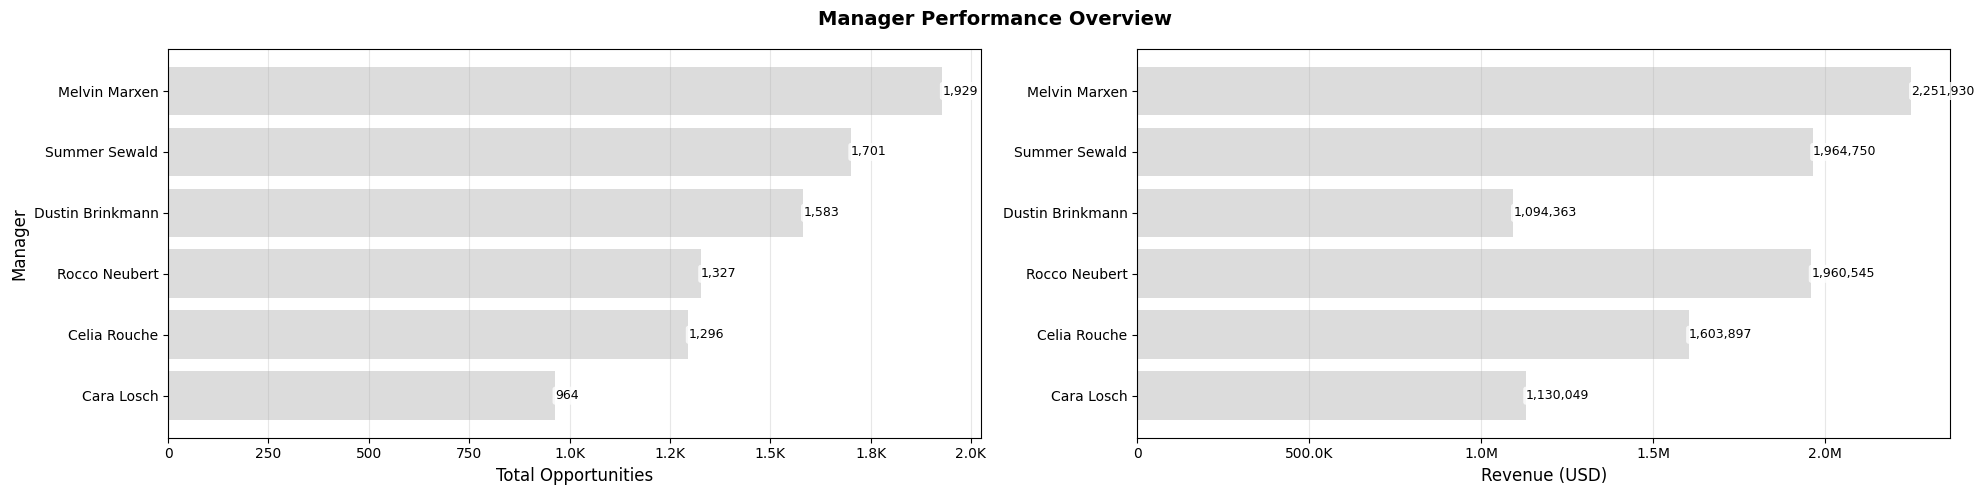

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

barh_chart(
    x=manager_performance.index,
    y=manager_performance['total_opportunities'],
    xlabel='Total Opportunities',
    ylabel='Manager',
    ax=axes[0]
)

barh_chart(
    x=manager_performance.index,
    y=manager_performance['total_revenue'],
    xlabel='Revenue (USD)',
    ax=axes[1]
)
fig.suptitle("Manager Performance Overview", fontsize=14, fontweight='black')
plt.tight_layout()

In [56]:
agent_performance = (
    sales_df
    .groupby(['manager','sales_agent'])
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_deal_days=('deal_days', 'mean'),
        total_initial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        total_revenue=('deal_value', 'sum'),
        deal_gap=('deal_gap', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        avg_revenue=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
    )
    .assign(
        deal_gap_pct=lambda d: (d['deal_gap'] / d['total_initial_price'] * 100).round(2),
        win_rate=lambda d: (d['won_deals'] / d['total_opportunities'] * 100).round(2),
    )
)
agent_performance["avg_deal_days"] = agent_performance["avg_deal_days"].map(lambda x: f"{x:.0f}")
agent_performance = agent_performance.sort_values(by=['manager','total_revenue'], ascending=False).reset_index()
agent_performance.map(commas).set_index(['manager','sales_agent'])

total_opportunities won_deals  \
manager          sales_agent                                        
Summer Sewald    Kary Hendrixson                    438       209   
                 Zane Levy                          349       161   
                 James Ascencio                     267       135   
                 Maureen Marcano                    285       149   
                 Kami Bicknell                      362       174   
Rocco Neubert    Cassey Cress                       346       163   
                 Donn Cantrell                      275       158   
                 Reed Clapper                       237       155   
                 Daniell Hammack                    259       114   
                 Boris Faz                          210       101   
Melvin Marxen    Darcel Schlecht                    747       349   
                 Gladys Colclough                   317       135   
                 Marty Freudenburg                  281       122   
                 Jonathan Berthelot                 345       171   
                 Niesha Huffines                    239       105   
Dustin Brinkmann Anna Snelling                      448       208   
                 Cecily Lampkin                     203       107   
                 Moses Frase                        260       129   
                 Lajuana Vencill                    311       127   
                 Versie Hillebrand                  361       176   
Celia Rouche     Vicki Laflamme                     451       221   
                 Markita Hansen                     306       130   
                 Elease Gluck                       177        80   
                 Hayden Neloms                      202       107   
                 Rosalina Dieter                    160        72   
Cara Losch       Corliss Cosme                      310       150   
                 Rosie Papadopoulos                 160        78   
                 Garret Kinder                      123        75   
                 Wilburn Farren                     110        55   
                 Violet Mclelland                   261       122   

                                    avg_deal_days total_initial_price  \
manager          sales_agent                                            
Summer Sewald    Kary Hendrixson               50             456,859   
                 Zane Levy                     44             426,264   
                 James Ascencio                50             412,993   
                 Maureen Marcano               50             357,812   
                 Kami Bicknell                 48             322,888   
Rocco Neubert    Cassey Cress                  46             452,318   
                 Donn Cantrell                 49             442,541   
                 Reed Clapper                  45             440,875   
                 Daniell Hammack               45             359,016   
                 Boris Faz                     43             261,882   
Melvin Marxen    Darcel Schlecht               46           1,157,130   
                 Gladys Colclough              48             343,141   
                 Marty Freudenburg             46             290,801   
                 Jonathan Berthelot            50             284,867   
                 Niesha Huffines               53             172,762   
Dustin Brinkmann Anna Snelling                 50             275,359   
                 Cecily Lampkin                39             232,874   
                 Moses Frase                   57             205,396   
                 Lajuana Vencill               53             198,054   
                 Versie Hillebrand             47             191,810   
Celia Rouche     Vicki Laflamme                47             481,090   
                 Markita Hansen                48             327,394   
                 Elease Gluck                  46             289,980   
  

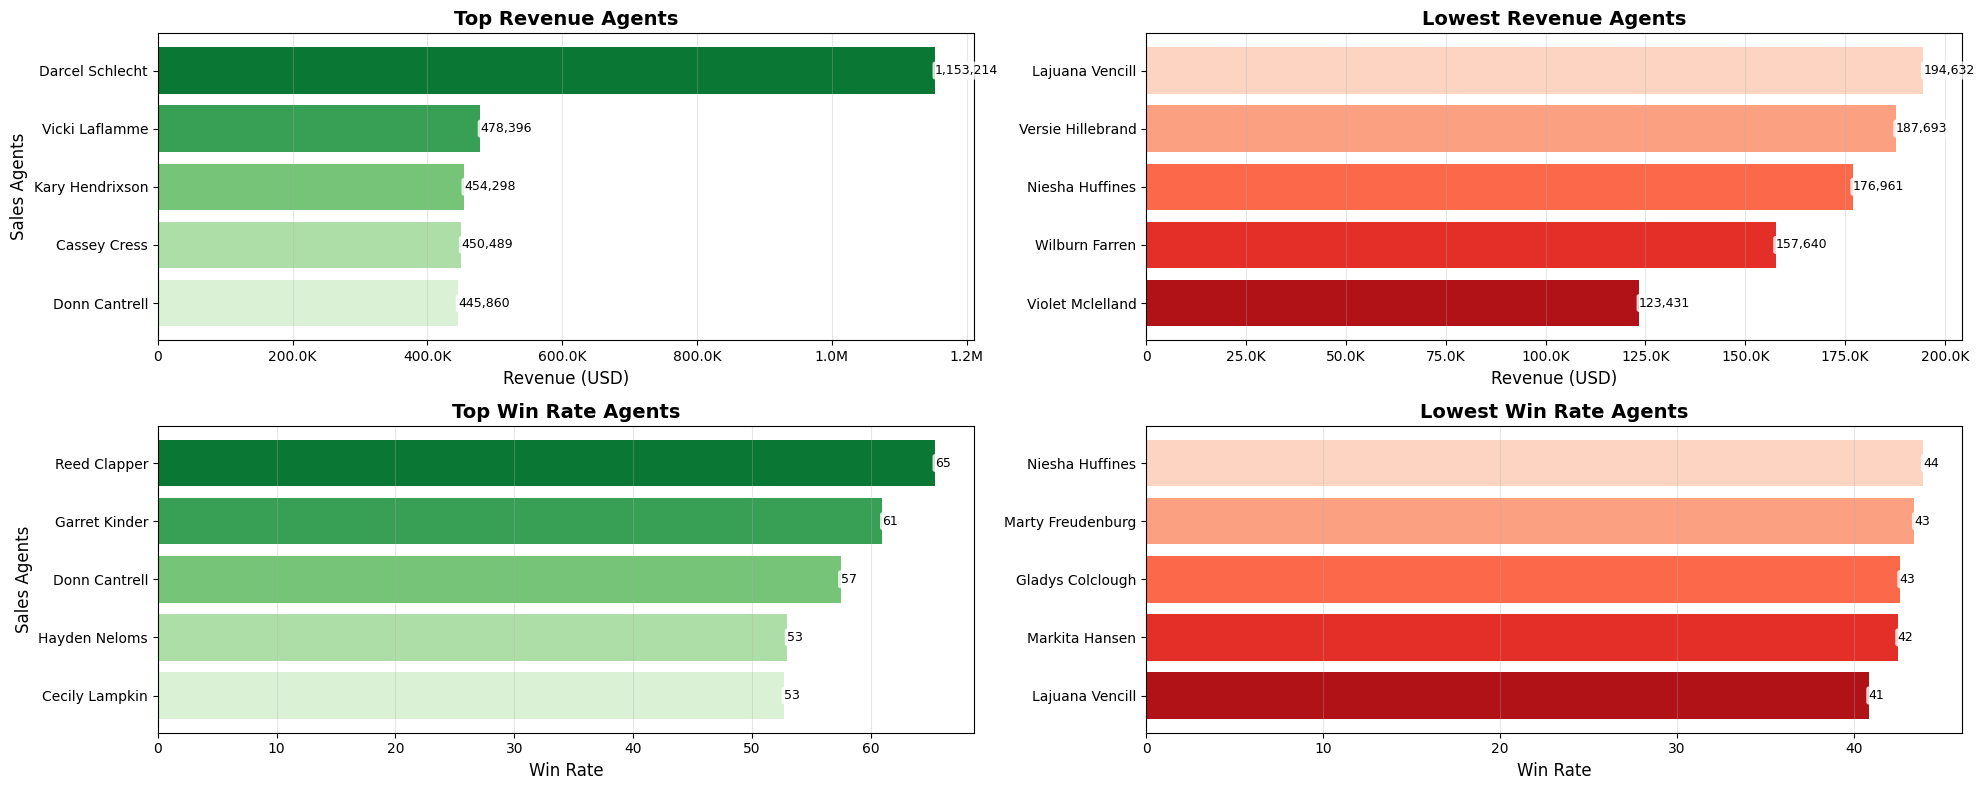

In [57]:
top_agents_revenue = agent_performance.sort_values(by='total_revenue', ascending=False).head(5)
lowest_agents_revenue = agent_performance.sort_values(by='total_revenue', ascending=False).tail(5)
top_agents_winrate = agent_performance.sort_values(by='win_rate', ascending=False).head(5)
lowest_agents_winrate = agent_performance.sort_values(by='win_rate', ascending=False).tail(5)

fig, axes = plt.subplots(2, 2, figsize=(20, 8))

barh_chart(
    x=top_agents_revenue['sales_agent'],
    y=top_agents_revenue['total_revenue'],
    xlabel='Revenue (USD)',
    ylabel='Sales Agents',
    title="Top Revenue Agents",
    palette='Greens_r',
    ax=axes[0,0]
)

barh_chart(
    x=lowest_agents_revenue['sales_agent'],
    y=lowest_agents_revenue['total_revenue'],
    xlabel='Revenue (USD)',
    title="Lowest Revenue Agents",
    palette='Reds',
    ax=axes[0,1]
)

barh_chart(
    x=top_agents_winrate['sales_agent'],
    y=top_agents_winrate['win_rate'],
    xlabel='Win Rate',
    ylabel='Sales Agents',
    title="Top Win Rate Agents",
    palette='Greens_r',
    ax=axes[1,0]
)

barh_chart(
    x=lowest_agents_winrate['sales_agent'],
    y=lowest_agents_winrate['win_rate'],
    xlabel='Win Rate',
    title="Lowest Win Rate Agents",
    palette='Reds',
    ax=axes[1,1]
)

plt.tight_layout()

In [58]:
agent_performance.sort_values(by=['total_opportunities','total_revenue'], ascending=[False,True]).map(commas)

,manager,sales_agent,total_opportunities,won_deals,avg_deal_days,total_initial_price,total_revenue,deal_gap,avg_revenue,deal_gap_pct,win_rate
10,Melvin Marxen,Darcel Schlecht,747,349,46,"1,157,130","1,153,214","-3,916","3,304.34",-0.34,46.72
20,Celia Rouche,Vicki Laflamme,451,221,47,"481,090","478,396","-2,694","2,164.69",-0.56,49.00
15,Dustin Brinkmann,Anna Snelling,448,208,50,"275,359","275,056",-303,"1,322.38",-0.11,46.43
0,Summer Sewald,Kary Hendrixson,438,209,50,"456,859","454,298","-2,561","2,173.67",-0.56,47.72
4,Summer Sewald,Kami Bicknell,362,174,48,"322,888","316,456","-6,432","1,818.71",-1.99,48.07
19,Dustin Brinkmann,Versie Hillebrand,361,176,47,"191,810","187,693","-4,117","1,066.44",-2.15,48.75
1,Summer Sewald,Zane Levy,349,161,44,"426,264","430,068","3,804","2,671.23",0.89,46.13
5,Rocco Neubert,Cassey Cress,346,163,46,"452,318","450,489","-1,829","2,763.74",-0.40,47.11
13,Melvin Marxen,Jonathan Berthelot,345,171,50,"284,867","284,886",19,"1,666.00",0.01,49.57
11,Melvin Marxen,Gladys Colclough,317,135,48,"343,141","345,674","2,533","2,560.55",0.74,42.59


> Insights
- Manager
  - Rocco Neubert (52.07%) had the highest win rate and the highest average revenue per deal (2,837.26). This indicates his team's effectiveness at closing and focus on high-value deals
  - Melvin Marxen (1,929 opps) is the manager with the most opportunities, but the lowest win rate (45.72%)
- Agents
  - Reed Clapper (65.40% win rate, on Rocco Neubert's team) is the agent with the highest win rate. This demonstrates high efficiency in closing
  - Darcel Schlecht (747 opps, 46.72% win rate) and Vicki Laflamme (451 opps, 49% win rate) have large deal sizes, indicating they are strong in prospecting and pipeline building
  - There are indications of a negative revenue gap (greater value lost during closing), such as Kami Bicknell, with a -1.99% deal gap; Maureen Marcano, with a -2.07% deal gap; and Versie Hillebrand, with a -2.15% deal gap

> Recommendations
- Manager
  1. Establish clear discount policy guidelines to maintain revenue consistency
  2. Managers with negative gaps (Summer, Dustin, Celia) need training in price negotiation and value selling to avoid excessive margin losses
- Agent
  1. Agents with high win rates (Reed Clapper, Hayden Neloms, Cecily Lampkin) can serve as role models/trainers for struggling agents
  2. Agents with the ability to handle large deals (e.g., Donn Cantrell, Garret Kinder, Wilburn Farren) should be directed to focus more on strategic/high-value accounts
  3. Distribute multiple leads to agents with high closing quality to optimize total revenue

## Product & Industry analysis

### Industry

In [59]:
industry_analysis = (
    sales_df
    .groupby(['industry_sector'])
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_intitial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
        total_initial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        total_revenue=('deal_value', 'sum'),
        deal_gap=('deal_gap', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
    )
)
industry_analysis = industry_analysis.dropna()
industry_analysis["avg_intitial_price"] = industry_analysis["avg_intitial_price"].map(lambda x: f"{x:,.0f}")
industry_analysis = industry_analysis.sort_values(by='total_revenue', ascending=False)
industry_analysis.map(commas)

,total_opportunities,won_deals,avg_intitial_price,total_initial_price,total_revenue,deal_gap
industry_sector,,,,,,
Retail,"1,397",799,"2,349","1,876,731","1,867,528","-9,203"
Technology,"1,165",671,"2,250","1,509,566","1,515,487","5,921"
Medical,"1,051",592,"2,307","1,365,462","1,359,595","-5,867"
Software,757,450,"2,409","1,084,218","1,077,934","-6,284"
Finance,678,375,"2,530","948,867","950,908","2,041"
Marketing,674,404,"2,277","920,005","922,321","2,316"
Entertainment,451,260,"2,644","687,454","689,007","1,553"
Telecommunications,501,285,"2,318","660,530","653,574","-6,956"
Services,390,223,"2,387","532,249","533,006",757


<Axes: title={'center': 'Top Products'}, xlabel='Revenue (USD)', ylabel='Product Name'>

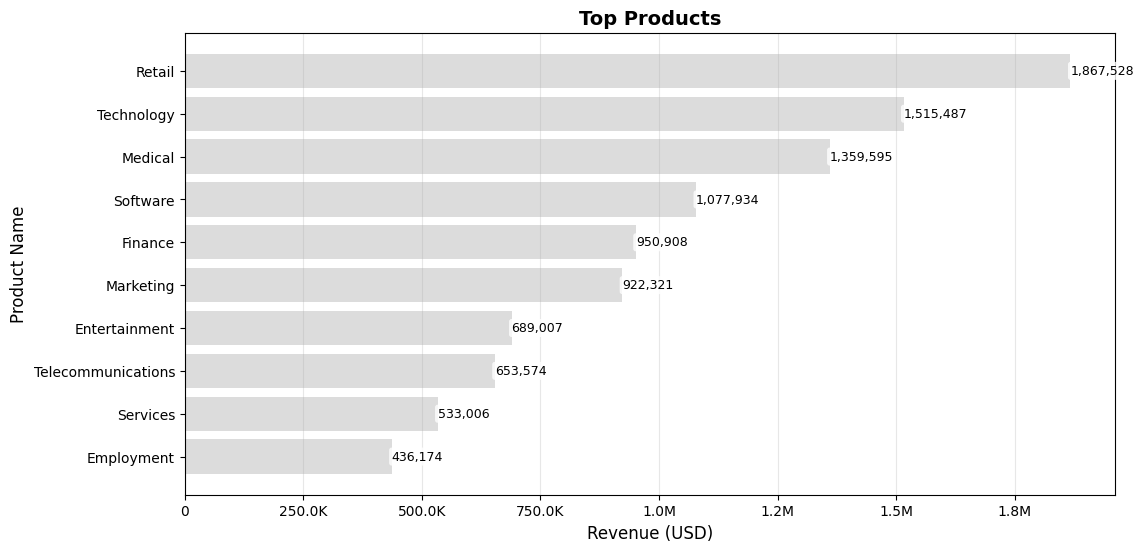

In [60]:
barh_chart(
    x=industry_analysis.index,
    y=industry_analysis['total_revenue'],
    xlabel='Revenue (USD)',
    ylabel='Product Name',
    title="Top Products",
)

### Series

In [61]:
series_analysis = (
    sales_df
    .groupby(['series'])
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_intitial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
        total_initial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        total_revenue=('deal_value', 'sum'),
        deal_gap=('deal_gap', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
    )
).reset_index()
series_analysis["avg_intitial_price"] = series_analysis["avg_intitial_price"].map(lambda x: f"{x:,.0f}")
series_analysis.sort_values(by='total_revenue', ascending=False).map(commas)

,series,total_opportunities,won_deals,avg_intitial_price,total_initial_price,total_revenue,deal_gap
1,GTX,"5,697","2,776","2,651","7,359,325","7,344,767","-14,558"
2,MG,"3,063","1,447","1,564","2,262,637","2,260,155","-2,482"
0,GTK,40,15,"26,768","401,520","400,612",-908


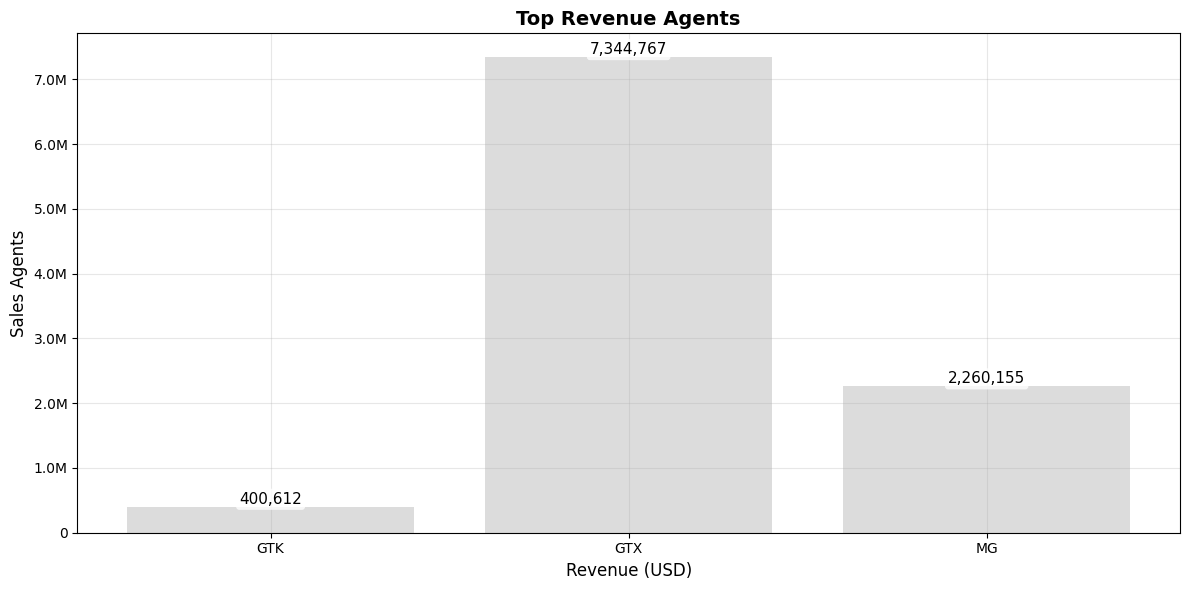

In [62]:
bar_chart(
    x=series_analysis['series'],
    y=series_analysis['total_revenue'],
    xlabel='Revenue (USD)',
    ylabel='Sales Agents',
    title="Top Revenue Agents",
)

### Product

In [63]:
product_analysis = (
    sales_df
    .groupby(['series','product'])
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_intitial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
        total_initial_price=('sales_price', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
        total_revenue=('deal_value', 'sum'),
        deal_gap=('deal_gap', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].sum()),
    )
).reset_index()
product_analysis = product_analysis.dropna()
product_analysis["avg_intitial_price"] = product_analysis["avg_intitial_price"].map(lambda x: f"{x:,.0f}")
product_analysis.sort_values(by=['series','total_revenue'], ascending=False).set_index(['series', 'product']).map(commas)

total_opportunities won_deals avg_intitial_price  \
series product                                                           
MG     MG Advanced                  1,412       654              3,393   
       MG Special                   1,651       793                 55   
GTX    GTX Pro                      1,480       729              4,821   
       GTX Plus Pro                   968       479              5,482   
       GTX Plus Basic               1,383       653              1,096   
       GTX Basic                    1,866       915                550   
GTK    GTK 500                         40        15             26,768   

                      total_initial_price total_revenue deal_gap  
series product                                                    
MG     MG Advanced              2,219,022     2,216,387   -2,635  
       MG Special                  43,615        43,768      153  
GTX    GTX Pro                  3,514,509     3,510,578   -3,931  
       GTX Plus Pro             2,625,878     2,629,651    3,773  
       GTX Plus Basic             715,688       705,275  -10,413  
       GTX Basic                  503,250       499,263   -3,987  
GTK    GTK 500                    401,520       400,612     -908

<Axes: title={'center': 'Top Products'}, xlabel='Revenue (USD)', ylabel='Product Name'>

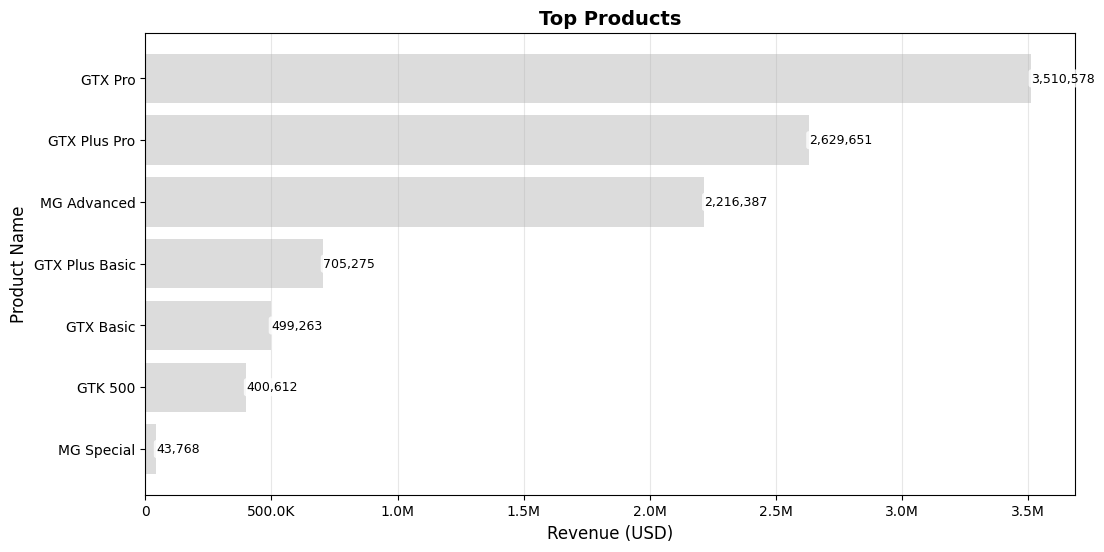

In [64]:
top_product_analysis = product_analysis.sort_values(by='total_revenue', ascending=False)
barh_chart(
    x=top_product_analysis['product'],
    y=top_product_analysis['total_revenue'],
    xlabel='Revenue (USD)',
    ylabel='Product Name',
    title="Top Products",
)

> Insight 
  - Retail (1.87M revenue) and Technology (1.51M revenue) contribute the majority
  - Software & Telecom underperformed despite numerous opportunities (757 & 501), lower revenue with negative deal_gap (−6.284 & −6.956)
  - The GTX Series contributed ~70% of revenue (7.3M) with high win deals (2,776). The top products are the GTX Pro and GTX Plus Pro, generating the largest revenue
  - GTK, Small opportunity (40 opps) but high average initial price (26,768), suitable for the exclusive market

> Recommendations 
  - Prioritize the GTX series as primary product, strengthen promotions for the GTX Pro & GTX Plus Pro, as they contribute significantly.

## Business Performance Analysis

### Quarter Trends

In [65]:
quarter_trends = (
    sales_df
    .assign(quarter = sales_df['engage_date'].dt.to_period('Q'))
    .groupby('quarter')
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_deal_days=('deal_days', 'mean'),
        total_revenue=('deal_value', 'sum'),
        avg_revenue=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
    )
    .assign(
        win_rate=lambda d: (d['won_deals'] / d['total_opportunities'] * 100).round(2))
)
quarter_trends["avg_deal_days"] = quarter_trends["avg_deal_days"].map(lambda x: f"{x:.0f}")
quarter_trends.map(commas)

,total_opportunities,won_deals,avg_deal_days,total_revenue,avg_revenue,win_rate
quarter,,,,,,
2016Q4,358,250,99,"523,531","2,094.12",69.83
2017Q1,"1,619",898,68,"2,170,446","2,416.98",55.47
2017Q2,"2,388","1,246",45,"2,968,256","2,382.23",52.18
2017Q3,"2,770","1,207",45,"2,792,733","2,313.78",43.57
2017Q4,"1,165",637,19,"1,550,568","2,434.17",54.68


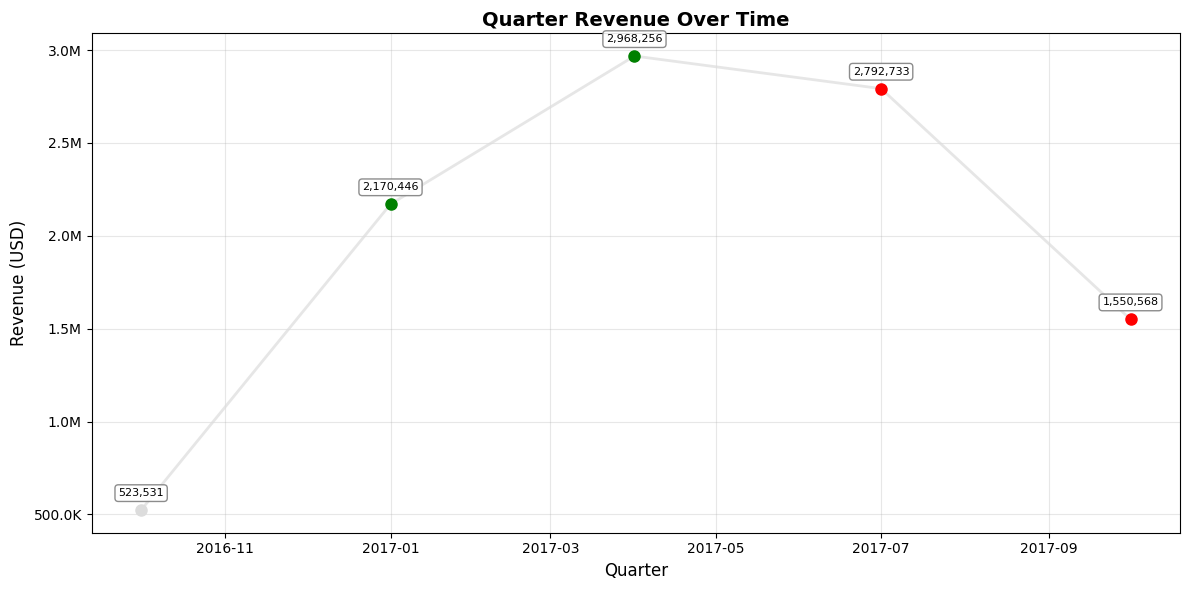

In [66]:
quarter_trends.index = quarter_trends.index.to_timestamp()
line_chart(
    x=quarter_trends.index,
    y=quarter_trends['total_revenue'],
    title='Quarter Revenue Over Time',
    xlabel='Quarter',
    ylabel='Revenue (USD)',
)

### Monthly Trends

In [67]:
monthly_trends = (
    sales_df
    .assign(month = sales_df['engage_date'].dt.to_period('M'))
    .groupby('month')
    .agg(
        total_opportunities=('opportunity_id', 'count'),
        won_deals=('deal_stage', lambda x: (x == 'Won').sum()),
        avg_deal_days=('deal_days', 'mean'),
        total_revenue=('deal_value', 'sum'),
        avg_revenue=('deal_value', lambda x: x[sales_df.loc[x.index, 'deal_stage'] == 'Won'].mean()),
    )
    .assign(
        win_rate=lambda d: (d['won_deals'] / d['total_opportunities'] * 100).round(2))
)
monthly_trends["avg_deal_days"] = monthly_trends["avg_deal_days"].round().astype(int)
monthly_trends.map(commas)

,total_opportunities,won_deals,avg_deal_days,total_revenue,avg_revenue,win_rate
month,,,,,,
2016-10,7,7,130,"6,829",975.57,100.00
2016-11,115,83,114,"196,672","2,369.54",72.17
2016-12,236,160,90,"320,030","2,000.19",67.80
2017-01,312,181,84,"408,451","2,256.64",58.01
2017-02,515,277,83,"757,978","2,736.38",53.79
2017-03,792,440,53,"1,004,017","2,281.86",55.56
2017-04,874,427,27,"1,035,338","2,424.68",48.86
2017-05,722,366,61,"852,638","2,329.61",50.69
2017-06,792,453,51,"1,080,280","2,384.72",57.20


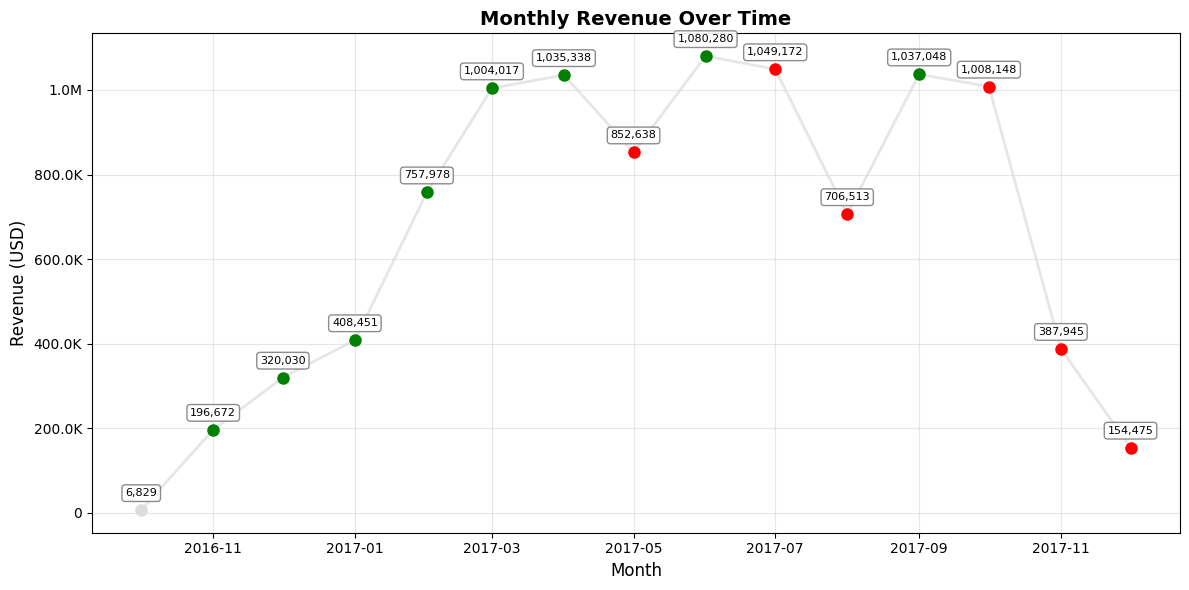

In [68]:
monthly_trends.index = monthly_trends.index.to_timestamp()
line_chart(
    x=monthly_trends.index,
    y=monthly_trends['total_revenue'],
    title='Monthly Revenue Over Time',
    xlabel='Month',
    ylabel='Revenue (USD)',
)

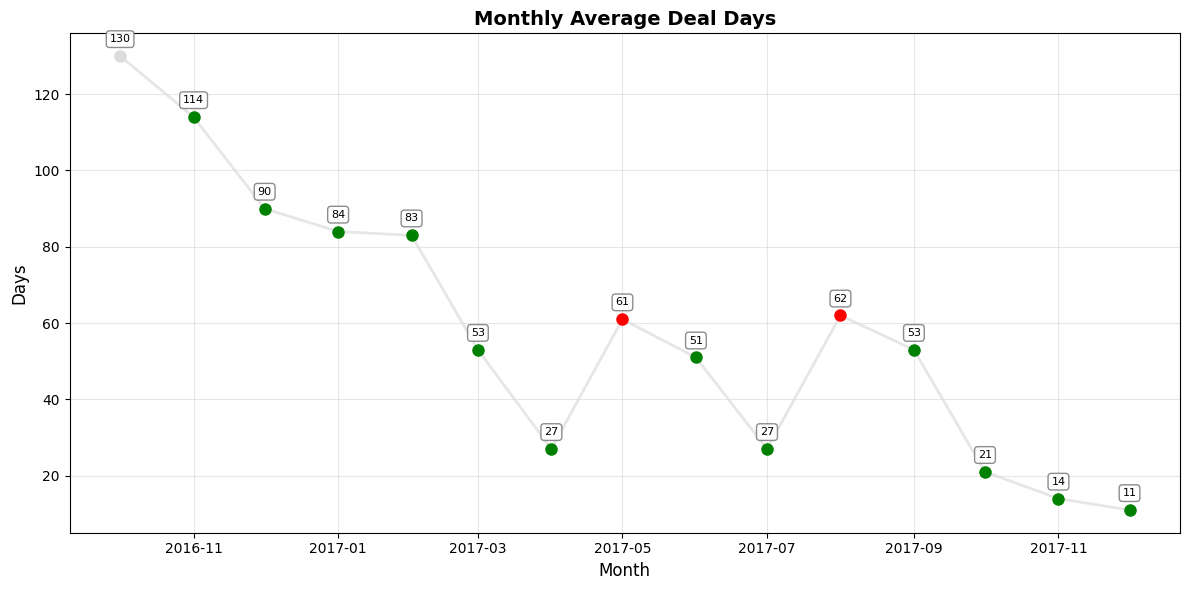

In [69]:
line_chart(
    x=monthly_trends.index,
    y=monthly_trends['avg_deal_days'],
    title='Monthly Average Deal Days',
    xlabel='Month',
    ylabel='Days',
    up_color='red',
    down_color='green'
)

> Insight
  - Deal duration has decreased significantly from 130 days (Oct 2016) to just 11–21 days (Nov–Dec 2017). This indicates a more efficient sales process.
  - Revenue is stable despite fluctuating win rates. For example, in July 2017, the win rate was low (36.8%), but revenue remained high (1.04M), indicating that high-value deals are still available despite many lost deals.